# Análise de dados - Inferência Estatística

O objetivo desta atividade é re-utilizar os dados de uma avaliação educacional federal e fazer algumas inferências sobre como as variáveis de estudo se comportam


O objetivo desta atividade é levantar alguma hipóteses sobre os dados e sugestões de intervenções.
No campo de políticas públicas, é sempre importante que as decisões sejam baseadas em dados (e não em achismos). Assim é importante saber:
-  O 6º ano e o 8º ano não reprovam, logo rend_6 e rend_8 devem estar o mais próximo possível de 1,0 (100%);
-  O As médias das notas de Língua Portuguesa e Matemática quanto maior melhor;
- Existe uma fórmula matemática que relaciona o Indicador de Rendimento, a Nota Padronizada e o IDEB;
- Os governos federal e distrital utilizam-se do IDEB para distribuir dinheiro para as escolas;
- No ano de 2021, que são as referências para estes dados, não houve reprovação por conta da pandemia de Covid 19.

Assim, utilizando novamente os dados de SAEB, vocês devem:
- (1) Análise a presença de outliers no redimento (aprovação) de cada um dos anos e das notas de Língua Portuguesa, Matemática e IDEB (faça o boxplot de cada uma dessas variáveis). Os dados estão bem distribuídos (utilize as técnicas que acharem mais viáveis para fazer esta análise);
- (2) Calcule a covariância das seguintes variáveis (variância conjunta): aprovação média e indicador de rendimento, indicador de rendimento e nota padronizada, nota padronizada e IDEB, indicador de rendimento e IDEB.
- (3) Faça gráficos de dispersão das informações acima. É possível identificar algum padrão?
- (4) Calcule a correlação dos itens pedidos em (2)
- (5) O que é possível inferir de todas as análises realizadas nos itens de (1) a (4).

In [97]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as py

dados = pd.read_csv('DadosIDEB (1).csv')
df_dados = pd.DataFrame(dados)
dados.head()

,UF,Municipio,Cod_Escola,Rede,Ap_Media,Rend_6,Rend_7,Rend_8,Rend_9,Indicador_de_rendimento,Nota_SAEB_Mat,Nota_SAEB_LP,Nota_Padronizada,IDEB
0,DF,Brasilia,53009380,Estadual,87.9,100.0,87.2,88.9,73.5,0.863522,226.82,239.87,4.444833,3.8
1,DF,Brasilia,53011589,Estadual,83.4,95.6,72.3,81.3,84.1,0.825044,239.28,240.48,4.662667,3.8
2,DF,Brasilia,53010019,Estadual,86.5,NaN,NaN,100.0,83.3,0.908893,231.85,223.94,4.263167,3.9
3,DF,Brasilia,53009665,Estadual,86.8,100.0,84.3,87.2,75.0,0.857199,240.40,244.53,4.748833,4.1
4,DF,Brasilia,53006720,Estadual,94.6,100.0,82.1,100.0,94.9,0.936381,235.71,238.84,4.575833,4.3


<Axes: >

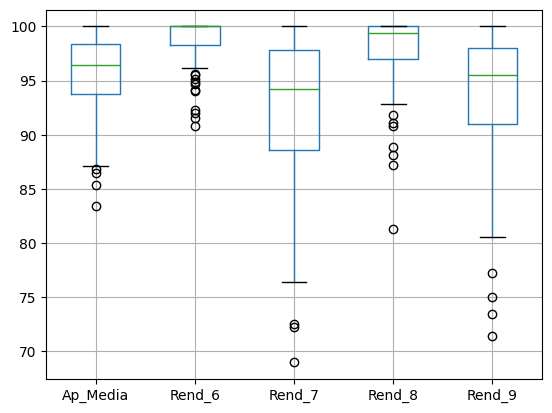

In [76]:
df_dados.loc[0:102, 'Ap_Media':'Rend_9'].boxplot()

<Axes: >

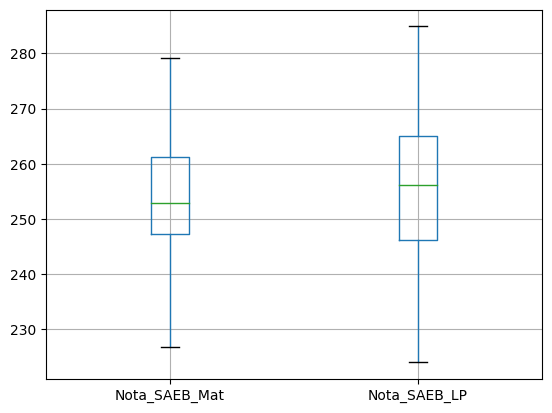

In [ ]:
df_dados.loc[0:102, 'Nota_SAEB_Mat':'Nota_SAEB_LP'].boxplot()

<Axes: >

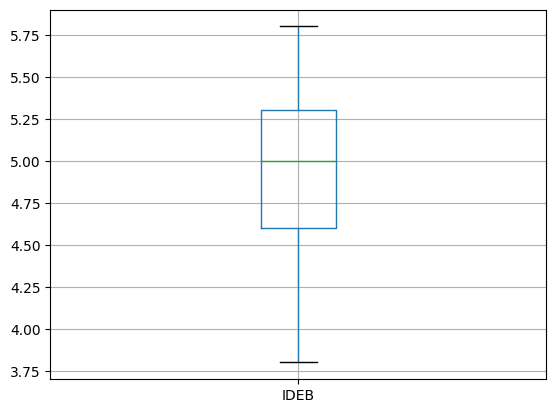

In [ ]:
df_dados.loc[0:102, ['IDEB']].boxplot()

          Indicador_de_rendimento
Ap_Media                 0.135585 



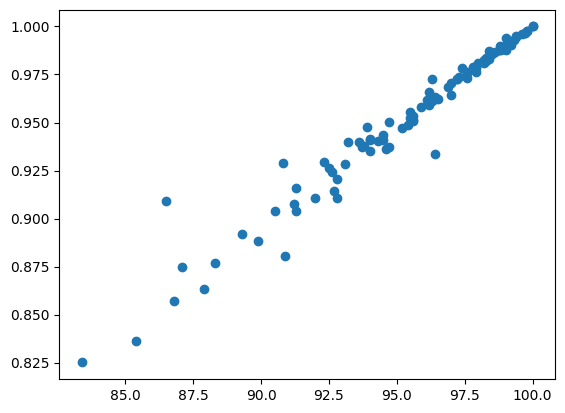

In [92]:
print(df_dados.loc[0:102, ['Ap_Media', 'Indicador_de_rendimento']].cov().drop('Indicador_de_rendimento', axis=0).drop('Ap_Media', axis=1), '\n')
py.scatter(dados['Ap_Media'], dados['Indicador_de_rendimento'])


                          Nota_Padronizada
Indicador_de_rendimento          0.003611 



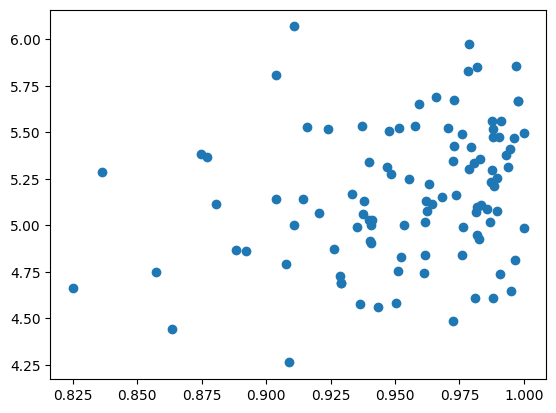

In [93]:
print('\n', df_dados.loc[0:102, ['Indicador_de_rendimento', 'Nota_Padronizada']].cov().drop('Nota_Padronizada', axis=0).drop('Indicador_de_rendimento', axis=1), '\n')
py.scatter(dados['Indicador_de_rendimento'], dados['Nota_Padronizada'])


                       IDEB
Nota_Padronizada  0.144665 



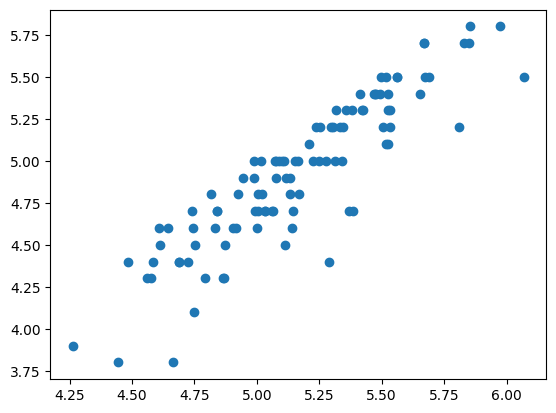

In [94]:
print('\n', df_dados.loc[0:102, ['Nota_Padronizada', 'IDEB']].cov().drop('IDEB', axis=0).drop('Nota_Padronizada', axis=1), '\n')
py.scatter(dados['Nota_Padronizada'], dados['IDEB'])


                              IDEB
Indicador_de_rendimento  0.011009 



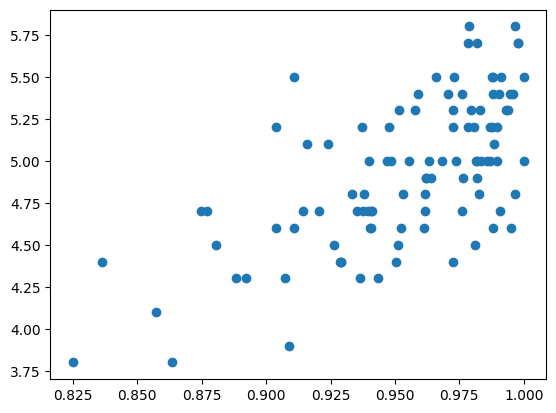

In [90]:
print('\n', df_dados.loc[0:102, ['Indicador_de_rendimento', 'IDEB']].cov().drop('IDEB', axis=0).drop('Indicador_de_rendimento', axis=1), '\n')
py.scatter(dados['Indicador_de_rendimento'], dados['IDEB'])

In [84]:
df_dados.loc[0:102, ['Ap_Media', 'Indicador_de_rendimento']].corr().drop('Indicador_de_rendimento', axis=0).drop('Ap_Media', axis=1)

,Indicador_de_rendimento
Ap_Media,0.97869


In [85]:
df_dados.loc[0:102, ['Indicador_de_rendimento', 'Nota_Padronizada']].corr().drop('Nota_Padronizada', axis=0).drop('Indicador_de_rendimento', axis=1)

,Nota_Padronizada
Indicador_de_rendimento,0.258338


In [86]:
df_dados.loc[0:102, ['Nota_Padronizada', 'IDEB']].corr().drop('IDEB', axis=0).drop('Nota_Padronizada', axis=1)

,IDEB
Nota_Padronizada,0.895621


In [87]:
df_dados.loc[0:102, ['Indicador_de_rendimento', 'IDEB']].corr().drop('IDEB', axis=0).drop('Indicador_de_rendimento', axis=1)

,IDEB
Indicador_de_rendimento,0.65538


In [ ]:
"""
É possível, analisando as correlações e as covariâncias, juntamente com os gráficos de dispersão, que:
  - Os dados Ap_Media e Indicador_de_rendimento estão positivamente relacionados, pois há um valor alto na correlação e os pontos no gráfico seguem uma reta ascendente
  - Os dados Indicador_de_rendimento e Nota_Padronizada não estão relacionados ou possuem uma baixíssima relação, pois o valor da correlação é bem baixo e os pontos no gráfico estão todos dispersos
  - Os dados Nota_Padronizada e IDEB estão positivamente relacionados, pois o valor da correlação é alto e os pontos no gráfico não estão muito dispersos e seguem praticamente uma reta ascendente
  - Os dados Indicador_de_rendimento e IDEB estão positivamente relacionados(não muito), pois o valor da correlação é médio e analisando o gráfico, os dados estão dispersos mas ainda é possível observar uma "reta" ascendente

Além disso, não há outliers em nenhum dos boxplots, seja de Nota_SAEB_LP, Nota_SAEB_Mat e IDEB. Logo, não há nenhum dado que se distâncie muito da média o que faz com que a média seja uma boa representação dos dados
No entanto, os rendimentos de cada ano e na Ap_Media possuem outliers, o que indica que a média não é uma boa representação de seus dados
"""